In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import Agent

# Реализовать 10-рукий испытательный стенд
Испольовать жадную стратегию(eps=0.1)

Ипспользовать методы:
<li> Выборочное среднее
<li> постоянный шаг

In [14]:
#бандюган. генерит начальные ценности для действий
class bandit:
    def __init__(self):
        self.action_table = pd.DataFrame(data={'E': np.random.uniform(-10,10,10),
                                               'D': np.random.uniform(0.02,10,10)})
    def get_action_maxE():
        ind_max_E = self.action_table[self.action_table['E'] == self.action_table['E'].max()].index.values
        if len(ind_max_E)>1:
            return np.random.choice(ind_max_E,1)[0]
        else:
            return ind_max_E[0]

    def get_reward(self, ind):
        return np.random.randn()*self.action_table.loc[ind]['D'] + self.action_table.loc[ind]['E']

метод выборочного среднего

In [15]:
#функция типо обучения бандита
def game(N):
    banditer = bandit()
    agent = Agent.Give_me_money(alpha = None)
    sum_reward = 0
    sum_optim = 0
    reward_avg = []
    percent_optim_step = []
    for i in range(N):
        A = agent.get_action()
        reward = banditer.get_reward(A)
        agent.is_done(reward)
        
        #считаем среднее возн-ние
        sum_reward+=reward
        reward_avg.append(sum_reward/(i+1))
        
        #проверяем на оптимальность действия
        if A == banditer.get_action_maxE:
            sum_optim+=1
        percent_optim_step.append(sum_optim/(i+1))
        
    return reward_avg,percent_optim_step

In [16]:
%%time
N = 10000
reward_avg_l,percent_optim_list = game(N)

CPU times: user 23.7 s, sys: 272 ms, total: 23.9 s
Wall time: 27 s


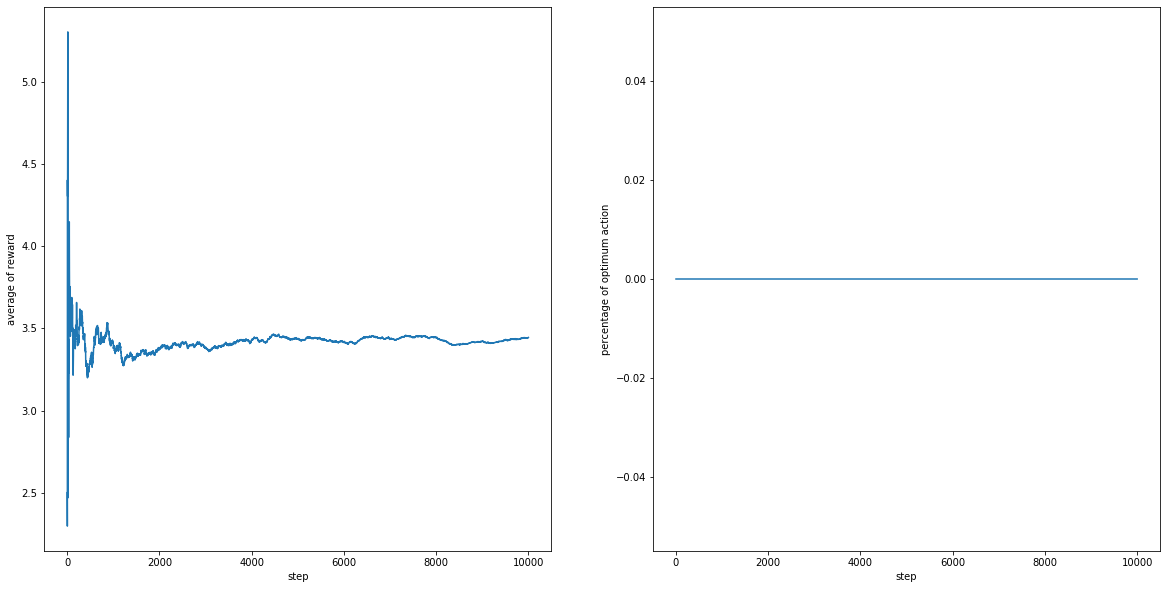

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax1.plot(range(len(reward_avg_l)),reward_avg_l)
ax1.set_ylabel('average of reward')
ax1.set_xlabel('step')

ax2.plot(range(len(percent_optim_list)),percent_optim_list)
ax2.set_ylabel('percentage of optimum action')
ax2.set_xlabel('step')
plt.show()

постоянный шаг

In [6]:
#функция типо обучения бандита
def game_const(N, alpha):
    banditer = bandit()
    agent = Agent.Give_me_money(alpha = alpha)
    sum_reward = 0
    sum_optim = 0
    reward_avg = []
    percent_optim_step = []
    for i in range(N):
        A = agent.get_action()
        reward = banditer.get_reward(A)
        agent.is_done(reward)
        
        #считаем среднее возн-ние
        sum_reward+=reward
        reward_avg.append(sum_reward/(i+1))
        
        #проверяем на оптимальность действия
        if A == banditer.get_action_maxE:
            sum_optim+=1
        percent_optim_step.append(sum_optim/(i+1))
    return reward_avg, percent_optim_step

In [10]:
alpha = 0.1
N = 10000
reward_avg_l,percent_optim_list = game_const(N,alpha)

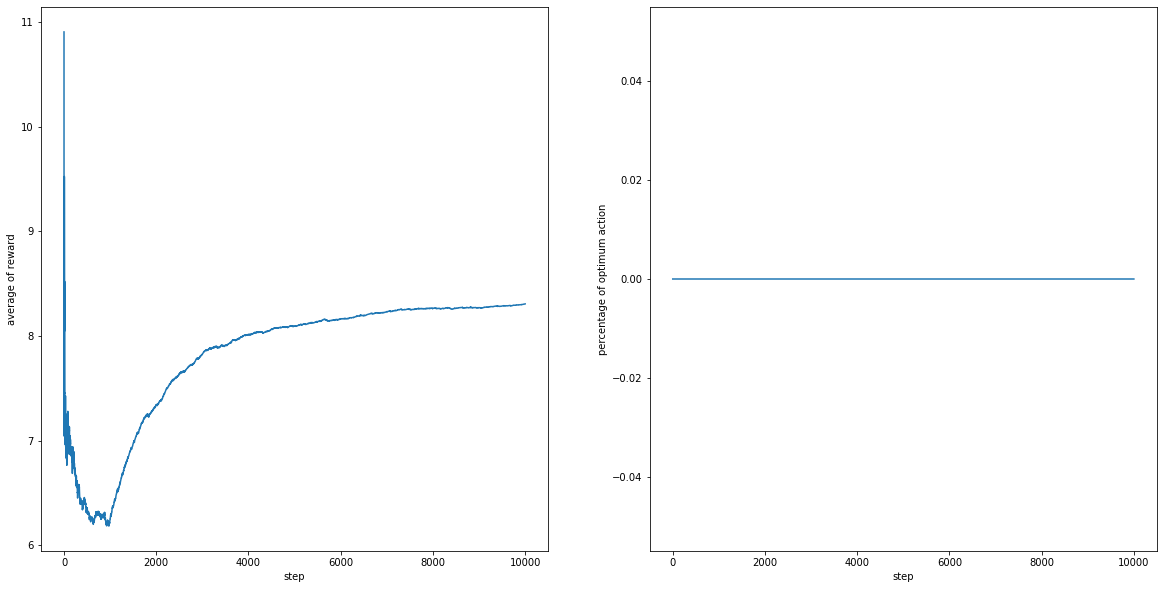

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax1.plot(range(len(reward_avg_l)),reward_avg_l)
ax1.set_ylabel('average of reward')
ax1.set_xlabel('step')

ax2.plot(range(len(percent_optim_list)),percent_optim_list)
ax2.set_ylabel('percentage of optimum action')
ax2.set_xlabel('step')
plt.show()